In [4]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

In [ ]:
#experiment configurations
obs_space_1 = {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "OccupancyGrid",
            "vehicles_count": 15,
            "features": ["presence", "x", "y", "vx", "vy"],
            "features_range": {
                "x": [-100, 100],
                "y": [-100, 100],
                "vx": [-20, 20],
                "vy": [-20, 20]
            },
            "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
            "grid_step": [5, 5],
        }
    }
obs_space_2 ={
            "type": "AugmentedMultiAgentObservation",
            "observation_config": {
                "type": "Kinematics"
            }
        }
obs_space_3 = {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "Kinematics"
            }
          }

run_config = {
    "env": {
        "observation": [obs_space_1, obs_space_2, obs_space_3]
    },
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [200,1000], 
         "use_reward_normalisation_wrapper": [False, True]
    },
    "train": {
         "num_iterations" : 100_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "hv_reference_point": np.ndarray([0,0]),
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [ ]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/mo_gridsearch_exp/")

### Data preprocessing

In [46]:
#load the data
df_complete = pd.read_csv("data/mo_gridsearch_exp/experiment_merged.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7200 non-null   int64  
 1   repetition_number                 7200 non-null   int64  
 2   weight_index                      7200 non-null   int64  
 3   weight_tuple                      7200 non-null   object 
 4   num_iterations                    7200 non-null   int64  
 5   normalised_speed_reward           7200 non-null   float64
 6   normalised_energy_reward          7200 non-null   float64
 7   raw_speed_reward                  7200 non-null   float64
 8   raw_energy_reward                 7200 non-null   float64
 9   env_config_id                     7200 non-null   int64  
 10  gamma                             7200 non-null   float64
 11  replay_buffer_size                7200 non-null   int64  
 12  use_re

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper
0,0,0,0,"[0.0, 1.0]",80,0.518410,0.968639,41.472799,77.491156,0,0.9,200,False
1,1,1,0,"[0.0, 1.0]",80,0.551567,0.998001,44.125377,79.840052,0,0.9,200,False
2,2,2,0,"[0.0, 1.0]",80,0.545885,0.999884,43.670832,79.990744,0,0.9,200,False
3,3,3,0,"[0.0, 1.0]",80,0.545885,0.999884,43.670832,79.990744,0,0.9,200,False
4,4,4,0,"[0.0, 1.0]",80,0.518423,0.968639,41.473862,77.491156,0,0.9,200,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,595,15,29,"[1.0, 0.0]",43,0.887321,0.810103,38.154785,34.834418,2,0.9,1000,True
7196,596,16,29,"[1.0, 0.0]",57,0.905935,0.804448,51.638308,45.853540,2,0.9,1000,True
7197,597,17,29,"[1.0, 0.0]",15,0.764303,0.828431,11.464549,12.426472,2,0.9,1000,True
7198,598,18,29,"[1.0, 0.0]",30,0.918901,0.765010,27.567034,22.950299,2,0.9,1000,True


In [47]:
#preprocess the dataframe
multi_index_list = ['env_config_id', 'replay_buffer_size', 'use_reward_normalisation_wrapper']
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

env_config_id replay_buffer_size  \
weight_index                                    
0                        0                200   
1                        0                200   
2                        0               1000   
3                        0               1000   
4                        1                200   
5                        1                200   
6                        1               1000   
7                        1               1000   
8                        2                200   
9                        2                200   
10                       2               1000   
11                       2               1000   

             use_reward_normalisation_wrapper normalised_energy_reward  \
weight_index                                                         0   
0                                       False                 0.989934   
1                                        True                 0.997248   
2                                       False                 0.994138   
3                                        True                 0.991270   
4                                       False                 0.998429   
5                                        True                 0.986860   
6                                       False                 0.996296   
7                                        True                 0.975853   
8                                       False                 0.998076   
9                                        True                 0.990794   
10                                      False                 0.991767   
11                                       True                 0.984515   

                                                                          ...  \
weight_index         1         2         3         4         5         6  ...   
0             0.980544  0.991033  0.977669  0.979049  0.975444  0.949224  ...   
1             0.997985  0.998090  0.997522  0.995984  0.995053  0.996593  ...   
2             0.994973  0.996582  0.996111  0.991650  0.994028  0.994626  ...   
3             0.989445  0.988363  0.987436  0.988848  0.988747  0.976461  ...   
4             0.997863  0.998325  0.997380  0.986005  0.991485  0.985441  ...   
5             0.982352  0.982543  0.985979  0.983287  0.982707  0.983335  ...   
6             0.997379  0.978634  0.993408  0.992657  0.991175  0.982336  ...   
7             0.979792  0.974985  0.988299  0.991407  0.966124  0.982222  ...   
8             0.998645  0.998579  0.998580  0.998559  0.998286  0.998590  ...   
9             0.993348  0.991555  0.990059  0.992403  0.989869  0.988866  ...   
10            0.987381  0.995118  0.995293  0.990173  0.986224  0.986240  ...   
11            0.988364  0.983140  0.979058  0.978255  0.977101  0.971123  ...   

             normalised_speed_reward                                          \
weight_index                      21        22        23        24        25   
0                           0.862539  0.876364  0.930591  0.890446  0.930985   
1                           0.912168  0.899608  0.868942  0.889015  0.915262   
2                           0.894649  0.888016  0.881041  0.905421  0.902269   
3                           0.816812  0.778942  0.832203  0.830068  0.887225   
4                           0.627827  0.643248  0.610269  0.652823  0.637630   
5                           0.598064  0.622607  0.616040  0.610427  0.639225   
6                           0.743019  0.825663  0.801137  0.842688  0.832783   
7                           0.599002  0.580209  0.607269  0.597704  0.620396   
8                           0.609435  0.583784  0.604085  0.627052  0.625620   
9                           0.572479  0.577069  0.573708  0.574301  0.573006   
10                          0.704402  0.727228  0.736542  0.746072  0.783803   
11                          0.756554  0.789536  0.787564  0.801353  0.757730   

                                 

In [48]:
multi_index_list = ['env_config_id', 'replay_buffer_size', 'use_reward_normalisation_wrapper', 'weight_index']

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360 entries, (0, 200, False, 0) to (2, 1000, True, 29)
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   env_config_id                     360 non-null    int64  
 1   replay_buffer_size                360 non-null    int64  
 2   use_reward_normalisation_wrapper  360 non-null    bool   
 3   weight_index                      360 non-null    int64  
 4   normalised_speed_reward           360 non-null    float64
 5   normalised_energy_reward          360 non-null    float64
 6   experiment                        360 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 20.5+ KB


None

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

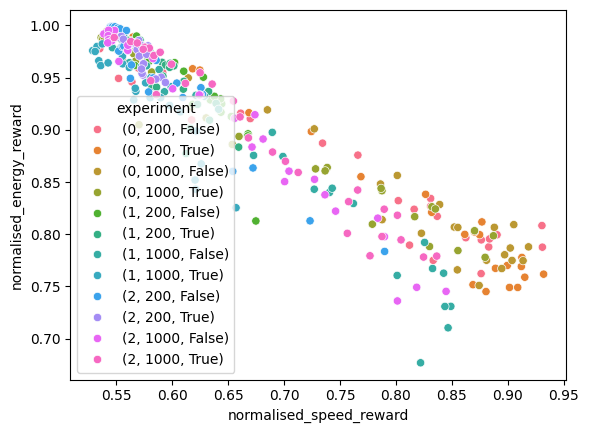

In [49]:
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

In [40]:


grouped_df_standard = df_standard.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()
grouped_df_separated = df_separated.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()
grouped_df_std_standard = df_standard.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].std()
grouped_df_separated_std = df_separated.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].std()
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
nds = NonDominatedSorting()
pareto_indices = nds.do(grouped_df_standard, only_non_dominated_front=True)
grouped_df_standard["pareto"] = False
grouped_df_standard.loc[pareto_indices,"pareto"] = True

pareto_indices = nds.do(grouped_df_separated, only_non_dominated_front=True)
grouped_df_separated["pareto"] = False
grouped_df_separated.loc[pareto_indices,"pareto"] = True

pareto_indices = nds.do(grouped_df_standard, only_non_dominated_front=True)
grouped_df_std_standard["pareto"] = False
grouped_df_std_standard.loc[pareto_indices,"pareto"] = True

pareto_indices = nds.do(grouped_df_separated, only_non_dominated_front=True)
grouped_df_separated_std["pareto"] = False
grouped_df_separated_std.loc[pareto_indices,"pareto"] = True


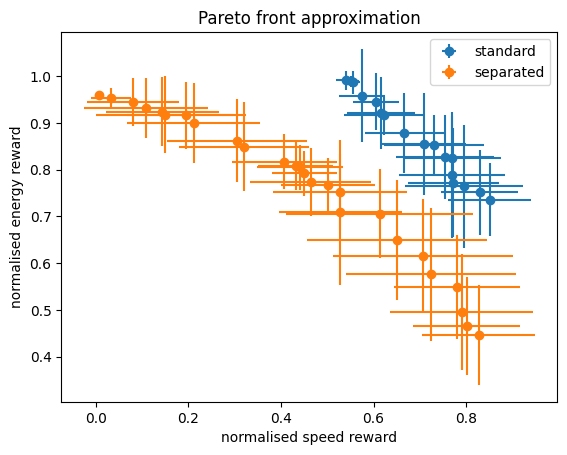

In [52]:
selected_mean_df  = grouped_df_standard[grouped_df_standard["pareto"]==True]
selected_std_df = grouped_df_std_standard[grouped_df_standard["pareto"]==True]

mean_df_separated = grouped_df_separated[grouped_df_separated["pareto"] == True]
std_df_separated = grouped_df_separated_std[grouped_df_separated["pareto"] == True]
#ax = selected_mean_df.plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward", c="blue", label="standard")
plt.errorbar(x=selected_mean_df["normalised_speed_reward"], y=selected_mean_df["normalised_energy_reward"],
             yerr=selected_std_df["normalised_energy_reward"], xerr=selected_std_df["normalised_speed_reward"], fmt='o', label="standard")

plt.errorbar(x=mean_df_separated["normalised_speed_reward"], y=mean_df_separated["normalised_energy_reward"],
             yerr=std_df_separated["normalised_energy_reward"], xerr=std_df_separated["normalised_speed_reward"], fmt='o', label="separated")
#grouped_df_separated[grouped_df_separated["pareto"]==True].plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward", ax=ax, c="red", label="separated")
#ax.set_aspect('equal')
#ax.set_ylim(ymin=0)
plt.xlabel("normalised speed reward")
plt.ylabel("normalised energy reward")
plt.title("Pareto front approximation")
plt.legend()

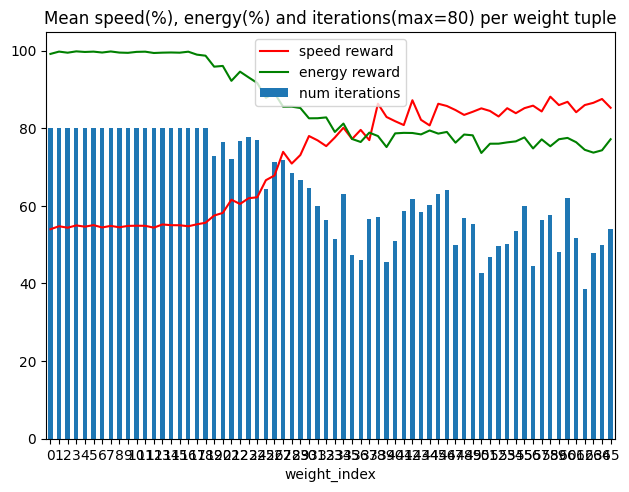

In [19]:

#separated
ax = df_standard.groupby("weight_index")["num_iterations"].mean().plot.bar(label="num iterations")
ax = (df_standard.groupby("weight_index")["normalised_speed_reward"].mean()*100).plot.line(ax=ax, label="speed reward", c="red")
(df_standard.groupby("weight_index")["normalised_energy_reward"].mean()*100).plot.line(ax=ax, label="energy reward", c="green")
plt.tight_layout()
plt.legend()
plt.title("Mean speed(%), energy(%) and iterations(max=80) per weight tuple")
plt.show()

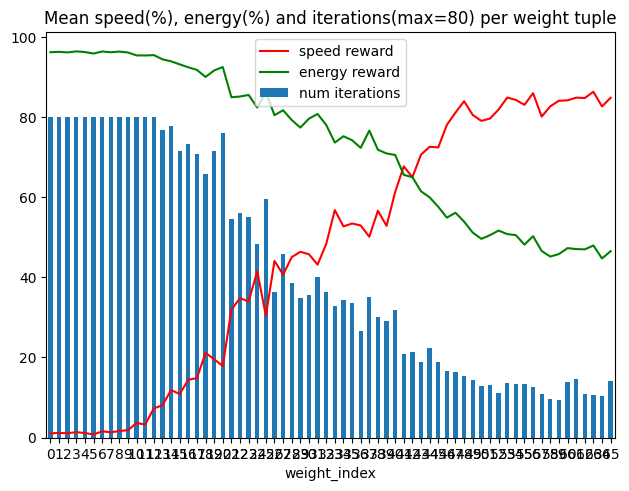

In [7]:
ax = df_separated.groupby("weight_index")["num_iterations"].mean().plot.bar(label="num iterations")
ax = (df_separated.groupby("weight_index")["normalised_speed_reward"].mean()*100).plot.line(ax=ax, label="speed reward", c="red")
(df_separated.groupby("weight_index")["normalised_energy_reward"].mean()*100).plot.line(ax=ax, label="energy reward", c="green")
plt.tight_layout()
plt.legend()
plt.title("Mean speed(%), energy(%) and iterations(max=80) per weight tuple")
plt.show()

Problem: cars crash for high speed weights. Possible cause: sparse penalty for collision, relatively low number of samples in the replay buffer. Solutions: importance sampling.

### Render Episodes

In [15]:
df = std_agent.evaluate(num_repetitions= 5, hv_reference_point=np.ndarray([0,0]), seed=11, num_points= 5, episode_recording_interval=None, render_episodes=True)


Weight tuple: 100%|██████████| 5/5 [00:39<00:00,  7.91s/it]


In [16]:
df = sep_agent.evaluate(num_repetitions= 5, hv_reference_point=np.ndarray([0,0]), seed=11, num_points= 5, episode_recording_interval=None, render_episodes=True)

Weight tuple: 100%|██████████| 5/5 [00:37<00:00,  7.54s/it]
